# Telco Customer Churn - Focused Customer retention 

## 3.0 Random Forest (Section 3) 

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")#suppresses warnings in the notebook. 
# warnings.resetwarnings() #commented line can be run to re-enable warnings.
#%pdb #enable or disable automatic activation of the debugger when exceptions occur.

#importing libraries for Random forest analysis 
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### 3.1 Data Preprocessing & Encoding

In [98]:
# Directory created for Jupyter Notebook for logistiv regression analysis.
# Notebook runs from same space all other paths are relative to 
# datafile addressed from the same space.

file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(file_path)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce') # data-cleansing
data_cleaned = data.dropna(subset=['TotalCharges'])

# Converting variables into dummy variables and setting 'Churn' to target variable
X = pd.get_dummies(data_cleaned.drop(['Churn', 'customerID'], axis=1))
y = data_cleaned['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

### 3.2 Data Splitting & Model Training


In [99]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialising the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42,class_weight='balanced')

# Training model w/ the training data
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42)

### 3.3 Model Prediction & Testing 

#### 3.3.1 Classification Report 

In [100]:
# Making predictions on the test data
y_pred = rf_classifier.predict(X_test_scaled)

# Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(conf_matrix)

Accuracy: 0.781042654028436
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.62      0.46      0.53       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110


Confusion Matrix:
[[1388  161]
 [ 301  260]]


#### 3.3.2 Feature Importances 

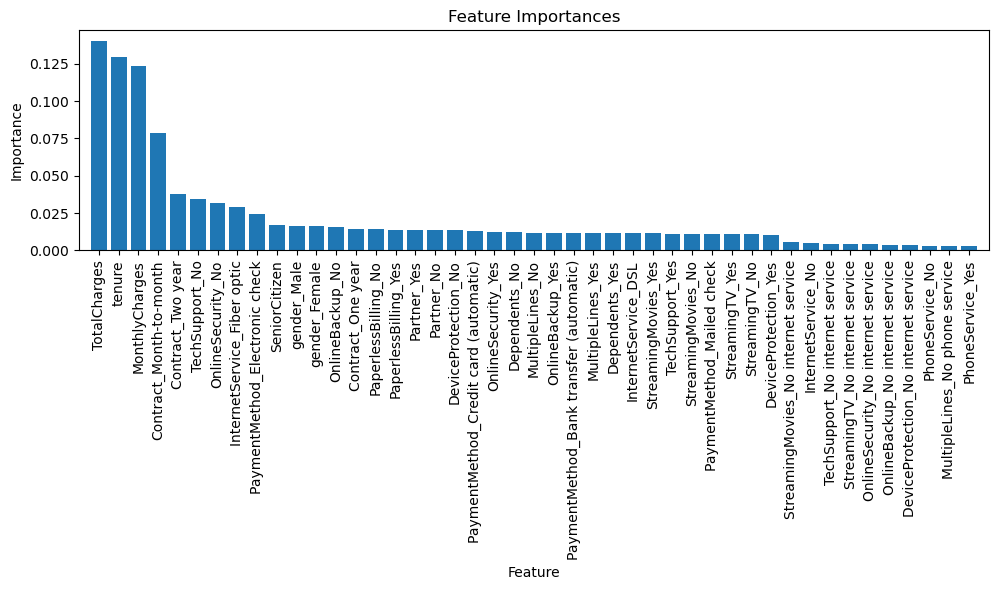

In [101]:
# Extracting feature importances from the model
importances = rf_classifier.feature_importances_

# Sorting the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Getting feature names sorted by importance
features = X.columns[indices]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

#### 3.3.3 ROC Curve

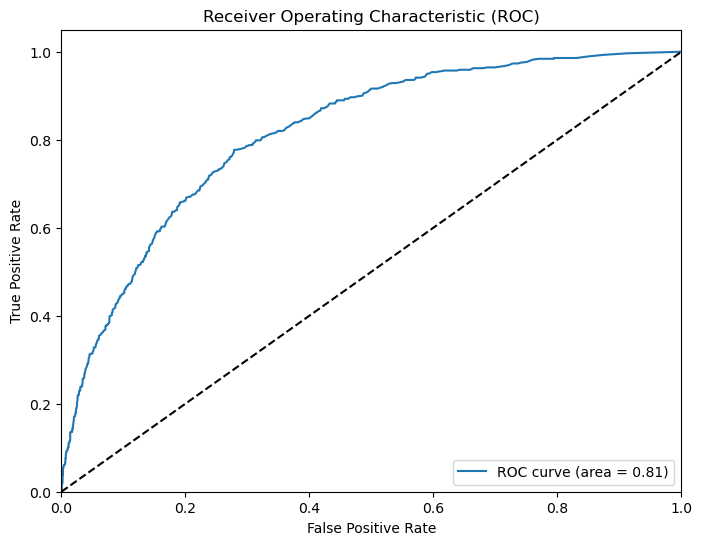

In [102]:
from sklearn.metrics import roc_curve, auc

# Calculating the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### [additional analysis (not covered in report)] 2-class Precision-Recall Curve

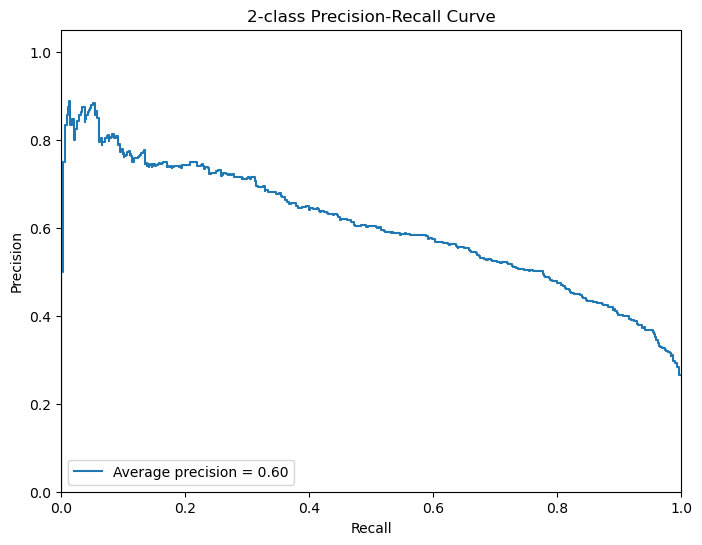

In [103]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, rf_classifier.predict_proba(X_test_scaled)[:, 1])
average_precision = average_precision_score(y_test, rf_classifier.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post', label=f'Average precision = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()